# Cryptocurrency Prediction with Deep Learning Models

a) Techniques to standardise distribution
b) model using days and not months
c) other ML Models


### Step 1: Importing required libraries

In [3]:
import matplotlib.pyplot as plt
import matplotlib
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
### Data Scrapping
import configparser
import json
import requests
from requests import Request, Session
import pytz


#### Data Processing
import pandas as pd
import numpy as np


### Keras for deep learning
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential

### Mapping Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### Time Logging
from datetime import datetime
import time
from dateutil import parser


### Time Series Analysis
from scipy import stats
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

### Visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm


2023-08-07 07:32:18.958632: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 07:32:19.129976: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-07 07:32:19.156924: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-07 07:32:19.156932: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

### Step 2: Web scrapping the data

In [5]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=CAD&limit=500')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'

In [6]:
hist.columns

Index(['high', 'low', 'open', 'volumefrom', 'volumeto', 'close',
       'conversionType', 'conversionSymbol'],
      dtype='object')

In [7]:
hist.value_counts

<bound method DataFrame.value_counts of                 high       low      open  volumefrom     volumeto     close  \
time                                                                          
2022-03-25  56394.68  54707.10  55119.75      58.360   3243644.22  55332.77   
2022-03-26  55892.52  55090.25  55332.77      33.160   1839166.13  55582.30   
2022-03-27  58514.17  55512.92  55582.30      48.140   2728428.28  58514.17   
2022-03-28  60350.47  58289.02  58514.17      78.060   4629781.37  58958.13   
2022-03-29  60190.07  58716.85  58958.13      41.070   2439373.83  59314.24   
...              ...       ...       ...         ...          ...       ...   
2023-08-03  39366.54  38697.15  38992.49      23.410    913864.20  38962.29   
2023-08-04  39590.40  38611.66  38962.29      28.730   1117174.48  38771.17   
2023-08-05  38948.51  38670.12  38771.17      20.290    786560.67  38783.52   
2023-08-06  38959.77  38667.43  38783.52       8.699    337644.61  38833.78   
2023-08-07  

In [8]:
hist.dtypes

high                float64
low                 float64
open                float64
volumefrom          float64
volumeto            float64
close               float64
conversionType       object
conversionSymbol     object
dtype: object

In [9]:
hist.head(10)

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2022-03-25,56394.68,54707.10,55119.75,58.36,3243644.22,55332.77,direct,
2022-03-26,55892.52,55090.25,55332.77,33.16,1839166.13,55582.30,direct,
2022-03-27,58514.17,55512.92,55582.30,48.14,2728428.28,58514.17,direct,
2022-03-28,60350.47,58289.02,58514.17,78.06,4629781.37,58958.13,direct,
2022-03-29,60190.07,58716.85,58958.13,41.07,2439373.83,59314.24,direct,
2022-03-30,59515.86,58236.97,59314.24,37.44,2202860.70,58671.62,direct,
2022-03-31,59474.60,56611.27,58671.62,66.42,3851872.00,56947.49,direct,
2022-04-01,58296.83,55363.48,56947.49,60.92,3456242.06,57807.28,direct,
2022-04-02,58948.47,57136.84,57807.28,31.95,1853130.03,57285.92,direct,


In [10]:
hist.tail(10)

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2023-07-29,39404.73,38707.30,38829.77,64.520,2503898.30,38862.27,direct,
2023-07-30,39166.29,38486.99,38862.27,25.620,991529.91,38682.10,direct,
2023-07-31,39014.61,38336.74,38682.10,43.330,1677683.15,38549.08,direct,
2023-08-01,39342.26,38055.90,38549.08,45.520,1748629.14,39342.26,direct,
2023-08-02,39770.45,38626.62,39342.26,32.920,1290921.63,38992.49,direct,
2023-08-03,39366.54,38697.15,38992.49,23.410,913864.20,38962.29,direct,
2023-08-04,39590.40,38611.66,38962.29,28.730,1117174.48,38771.17,direct,
2023-08-05,38948.51,38670.12,38771.17,20.290,786560.67,38783.52,direct,
2023-08-06,38959.77,38667.43,38783.52,8.699,337644.61,38833.78,direct,


### Step 3: Data Wrangling

In [11]:
hist.head(2)

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2022-03-25,56394.68,54707.10,55119.75,58.36,3243644.22,55332.77,direct,
2022-03-26,55892.52,55090.25,55332.77,33.16,1839166.13,55582.30,direct,


### Let's drop some unnecessary columns: ConversionType and Conversion Symbol

In [12]:
dataset2 = hist.drop('conversionType', axis=1)
dataset2.head(2)

,high,low,open,volumefrom,volumeto,close,conversionSymbol
time,,,,,,,
2022-03-25,56394.68,54707.10,55119.75,58.36,3243644.22,55332.77,
2022-03-26,55892.52,55090.25,55332.77,33.16,1839166.13,55582.30,


In [13]:
dataset3 = dataset2.drop('conversionSymbol', axis=1)
dataset3.head(2)

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2022-03-25,56394.68,54707.10,55119.75,58.36,3243644.22,55332.77
2022-03-26,55892.52,55090.25,55332.77,33.16,1839166.13,55582.30


In [14]:
dataset = dataset3
dataset.head(2)

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2022-03-25,56394.68,54707.10,55119.75,58.36,3243644.22,55332.77
2022-03-26,55892.52,55090.25,55332.77,33.16,1839166.13,55582.30


### Step 4: Checking Missing Values and Outliers Check

### Step 5: Data Modelling

In [15]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data
train, test = train_test_split(hist, test_size=0.2)

In [16]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [CAD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    line_plot(train[target_col], test[target_col], 'training', 'test', title='')

In [17]:
line_plot(training, test)

TypeError: line_plot() missing 2 required positional arguments: 'line1' and 'line2'

In [18]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [19]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [20]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

### LSTM Model

In [21]:
LSTM

keras.layers.rnn.lstm.LSTM

In [22]:
def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear', dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer)
    return model

In [23]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 100
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [24]:
train, test, X_train, X_test, y_train, y_test = prepare_data(dataset, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)


In [25]:
model = build_lstm_model(X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,optimizer=optimizer)


2023-08-07 07:32:38.772619: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-07 07:32:38.772816: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-07 07:32:38.772828: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kev): /proc/driver/nvidia/version does not exist
2023-08-07 07:32:38.773481: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
13/13 [==============================] - 1s 6ms/step - loss: 0.0070
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 4/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0028
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 9/20
13/13 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 10/20
13/13 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 11/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 12/20
13/13 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 13/20
13/13 [=============================

In [27]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)
# 0.027955859325876943

3/3 [==============================] - 0s 3ms/step


0.011639417998471463

In [ ]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)

RecursionError: maximum recursion depth exceeded in comparison

In [16]:


from pandas import json_normalize
import requests

r = requests.get('https://pro-api.coinmarketcap.com/v2/cryptocurrency/quotes/historical')
data = r.text

df = pd.json_normalize(data)

print(df)

NotImplementedError: 

In [26]:
PART TRIAL

SyntaxError: invalid syntax (207809915.py, line 1)

In [21]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [22]:
url = "https://pro-api.coinmarketcap.com/v2/cryptocurrency/quotes/historical"
content = requests.get(url).content
soup = BeautifulSoup(content, 'html.parser')
table = soup.find('table', {'class': 'table'})

In [24]:
#Nested list comprehension goes thro table rows and cols building list with the data
data = [[td.text.strip() for td in tr.findChildren('td')] for tr in table.findChildren('tr')]

AttributeError: 'NoneType' object has no attribute 'findChildren'

In [25]:
df = pd.DataFrame(data)
df.drop(df.index[0], inplace=True)
df[0] = pd.to_datetime(df[0])
for i in range(1, 7):
    df[i] = pd.to_numeric(df[i].str.replace(",","").str.replce(",",""))
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [44]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD',
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '3819b97c-ea22-4cae-b4da-fff96707f9df',
}

session = Session()
session.headers.update(headers)


try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-07-27T15:17:35.156Z', 'error_code': 0, 'error_message': None, 'elapsed': 0, 'credit_count': 1, 'notice': None}, 'data': [{'id': 1389, 'name': 'o9zjvmsk2qk', 'symbol': 'zf1vo64uc7', 'slug': 'ux26whq3nnp', 'cmc_rank': 4999, 'num_market_pairs': 5766, 'circulating_supply': 3137, 'total_supply': 5922, 'max_supply': 6940, 'infinite_supply': None, 'last_updated': '2023-07-27T15:17:35.156Z', 'date_added': '2023-07-27T15:17:35.156Z', 'tags': ['e9lvt2vmkvw', 'v8yxt5mtx9n', '2694q5dfih9', '3atn1itzuuk', 't85gj10kl2q', '7ugfgm5f8nv', '928jewwanuc', 'zwo2my88az', 'w9c512zzou', 'eqcmbgh6jl'], 'platform': None, 'self_reported_circulating_supply': None, 'self_reported_market_cap': None, 'quote': {'USD': {'price': 0.0025467337153877168, 'volume_24h': 6918, 'volume_change_24h': 0.5123436686447336, 'percent_change_1h': 0.5349242364833031, 'percent_change_24h': 0.8140064309018513, 'percent_change_7d': 0.11662569888255936, 'market_cap': 0.7082499828942379, 'market_cap_dominan

In [11]:



from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '3819b97c-ea22-4cae-b4da-fff96707f9df',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-07-27T14:16:42.253Z', 'error_code': 0, 'error_message': None, 'elapsed': 1, 'credit_count': 1, 'notice': None}, 'data': [{'id': 7961, 'name': '9us9djevr1d', 'symbol': 'vouri5j76yr', 'slug': '5v6seu0vshf', 'cmc_rank': 9013, 'num_market_pairs': 1079, 'circulating_supply': 2889, 'total_supply': 73, 'max_supply': 6143, 'infinite_supply': None, 'last_updated': '2023-07-27T14:16:42.252Z', 'date_added': '2023-07-27T14:16:42.252Z', 'tags': ['36cv2f1d8tt', 'i7gopuhi0br', '3uod7u5lpt1', 'rpmbbnat81', 'wisz8rmudjf', 'iuf3zrwr4ma', 'ozdqm4vp7b', 'h1mwmpquq6j', '7qhu31blgl5', 'kw81476fyir'], 'platform': None, 'self_reported_circulating_supply': None, 'self_reported_market_cap': None, 'quote': {'USD': {'price': 0.02727957322918617, 'volume_24h': 3000, 'volume_change_24h': 0.9325929454242377, 'percent_change_1h': 0.46449981099273674, 'percent_change_24h': 0.10895162993086993, 'percent_change_7d': 0.4071494365197177, 'market_cap': 0.865509710413801, 'market_cap_dominance

In [10]:
### Web scrapping for our dataset: API KEY= 3819b97c-ea22-4cae-b4da-fff96707f9df

def get_info():
    # Read the API key from the coinmarket.ini file
    config = configparser.ConfigParser()
    config.read('coinmarket.ini.odt')
    api_key = config['DEFAULT']['API_KEY']

    # Set up the request parameters and headers
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
    parameters = { 'slug': 'bitcoin', 'convert': 'USD' }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': api_key
    }

    # Send the request and retrieve the response
    session = Session()
    session.headers.update(headers)
    response = session.get(url, params=parameters)
    info = json.loads(response.text)

    # Extract the desired information from the response
    data = info['data']['1']
    name = data['name']
    symbol = data['symbol']
    rank = data['cmc_rank']
    total_supply = data['total_supply']
    circulating_supply = data['circulating_supply']
    market_cap = data['quote']['USD']['market_cap']
    price = data['quote']['USD']['price']
    market_cap_dominance = data['quote']['USD']['market_cap_dominance']
    percent_change_1h = data['quote']['USD']['percent_change_1h']
    percent_change_24h = data['quote']['USD']['percent_change_24h']
    volume_24h = data['quote']['USD']['volume_24h']
    volume_change_24h = data['quote']['USD']['volume_change_24h']
    timestamp = info['status']['timestamp']

    # Convert the timestamp to a timezone-aware datetime object
    timestamp_local = parser.parse(timestamp).astimezone(pytz.timezone('Turkey'))
    

    # Format the timestamp as desired
    formatted_timestamp = timestamp_local.strftime('%Y-%m-%d %H:%M:%S')

    # Print the information
    print(f'Name: {name}, Symbol: {symbol}, Price: {price:,.2f}, Percent change (1h): {percent_change_1h}, Percent change (24h): {percent_change_24h}, Total supply: {total_supply}, Circulating supply: {circulating_supply}, Market capitalization: {market_cap}, Market capitalization dominance: {market_cap_dominance}, Volume (24h): {volume_24h}, Volume change (24h): {volume_change_24h}, Timestamp: {formatted_timestamp}')

get_info()


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbc in position 10: invalid start byte

We are going to do time series analysis and forecasting for cryptocurrencies prices.

### Step 2: Importing our datasets

In [28]:
###YAHOO DATASET USING API
df = pd.read_csv('BTC Historical.csv')
df.info

<bound method DataFrame.info of             Date          Open          High           Low         Close  \
0     2019-01-02   3849.216309   3947.981201   3817.409424   3943.409424   
1     2019-01-03   3931.048584   3935.685059   3826.222900   3836.741211   
2     2019-01-04   3832.040039   3865.934570   3783.853760   3857.717529   
3     2019-01-05   3851.973877   3904.903076   3836.900146   3845.194580   
4     2019-01-06   3836.519043   4093.297363   3826.513184   4076.632568   
...          ...           ...           ...           ...           ...   
1457  2022-12-29  16552.322266  16651.755859  16508.683594  16642.341797   
1458  2022-12-30  16641.330078  16643.427734  16408.474609  16602.585938   
1459  2022-12-31  16603.673828  16628.986328  16517.519531  16547.496094   
1460  2023-01-01  16547.914063  16630.439453  16521.234375  16625.080078   
1461  2023-01-02  16625.509766  16759.343750  16572.228516  16688.470703   

         Adj Close       Volume  
0      3943.409424   

### Step 3: Exploratory Data Analysis

In [27]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [32]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
1,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219


In [33]:
df.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
1460,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
1461,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227


In [30]:
df.max()

Date           2023-01-02
Open         67549.734375
High            68789.625
Low            66382.0625
Close        67566.828125
Adj Close    67566.828125
Volume       350967941479
dtype: object

In [29]:
df.min()

Date          2019-01-02
Open         3401.376465
High         3427.945557
Low          3391.023682
Close         3399.47168
Adj Close     3399.47168
Volume        4530215219
dtype: object

In [34]:
df['Close'].max()

67566.828125

In [35]:
df['Adj Close'].max()

67566.828125

In [37]:
df['High'].max()

68789.625

In [38]:
df['Low'].min()

3391.023682

### Step 4: Data preprocessing

This step includes removing columns we do not need, check missing values, aggregate volume
by date and so on.

In [6]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

In [39]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [1]:
### We do not have any missing values in our dataset above

## Indexing with time series data

In [40]:
df = df.set_index('Date')
df.index

Index(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06',
       '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
       ...
       '2022-12-24', '2022-12-25', '2022-12-26', '2022-12-27', '2022-12-28',
       '2022-12-29', '2022-12-30', '2022-12-31', '2023-01-01', '2023-01-02'],
      dtype='object', name='Date', length=1462)

In [1]:
dataset= dataset.set_index('Date')
dataset.index

NameError: name 'dataset' is not defined

Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

Have a quick peek 2022 cryptocurrency prices data.

In [46]:
df['2022':]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
...,...,...,...,...,...,...
2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479
2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938,16602.585938,15929162910
2022-12-31,16603.673828,16628.986328,16517.519531,16547.496094,16547.496094,11239186456


In [47]:
y = df['2022':]

In [59]:
z = df['2022':]['Close']
z.head(5)

Date
2022-01-01    47686.812500
2022-01-02    47345.218750
2022-01-03    46458.117188
2022-01-04    45897.574219
2022-01-05    43569.003906
Name: Close, dtype: float64

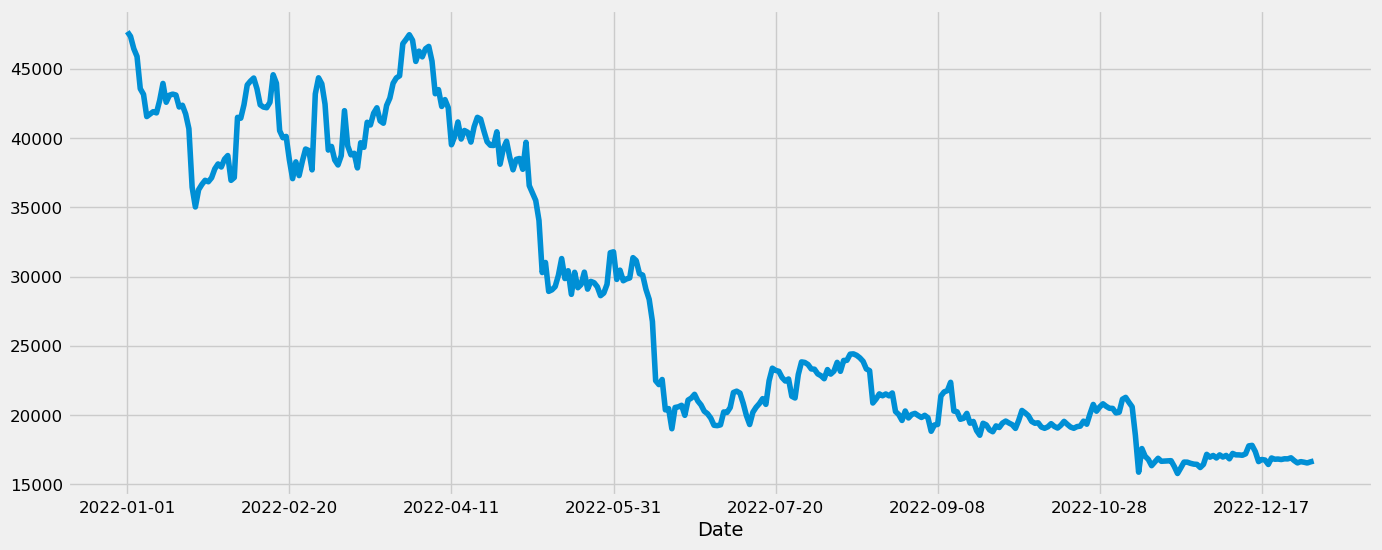

In [60]:
z.plot(figsize=(15, 6))
plt.show()

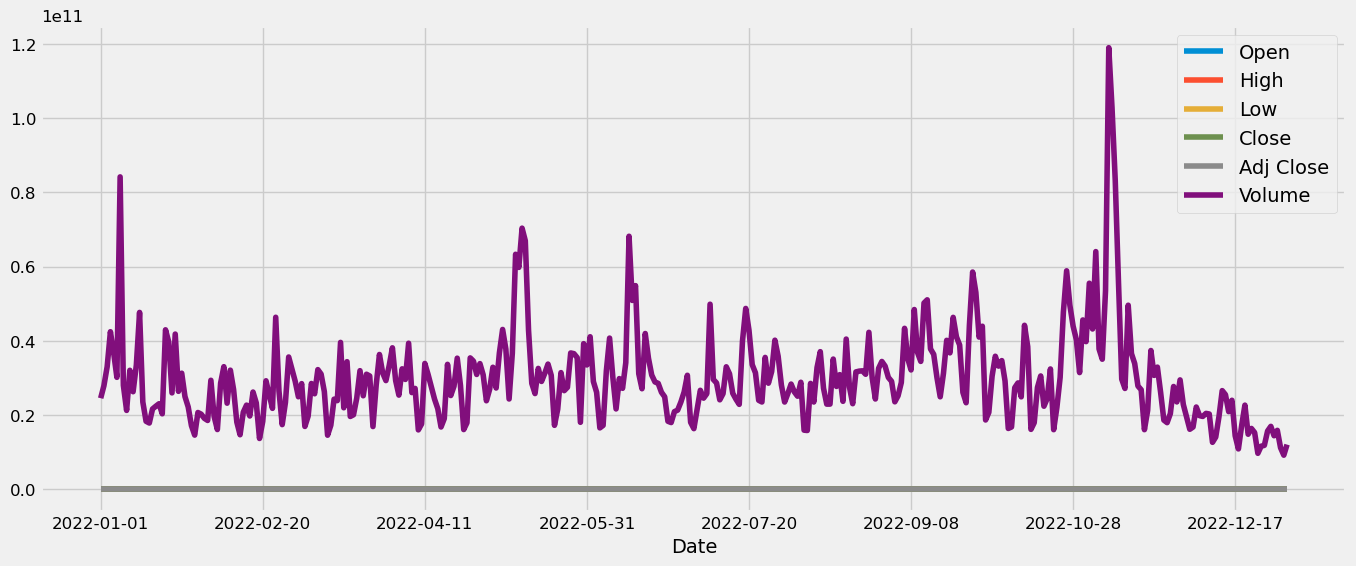

In [48]:
y.plot(figsize=(15, 6))
plt.show()

## Visualizing cryptocurrency prices time series data

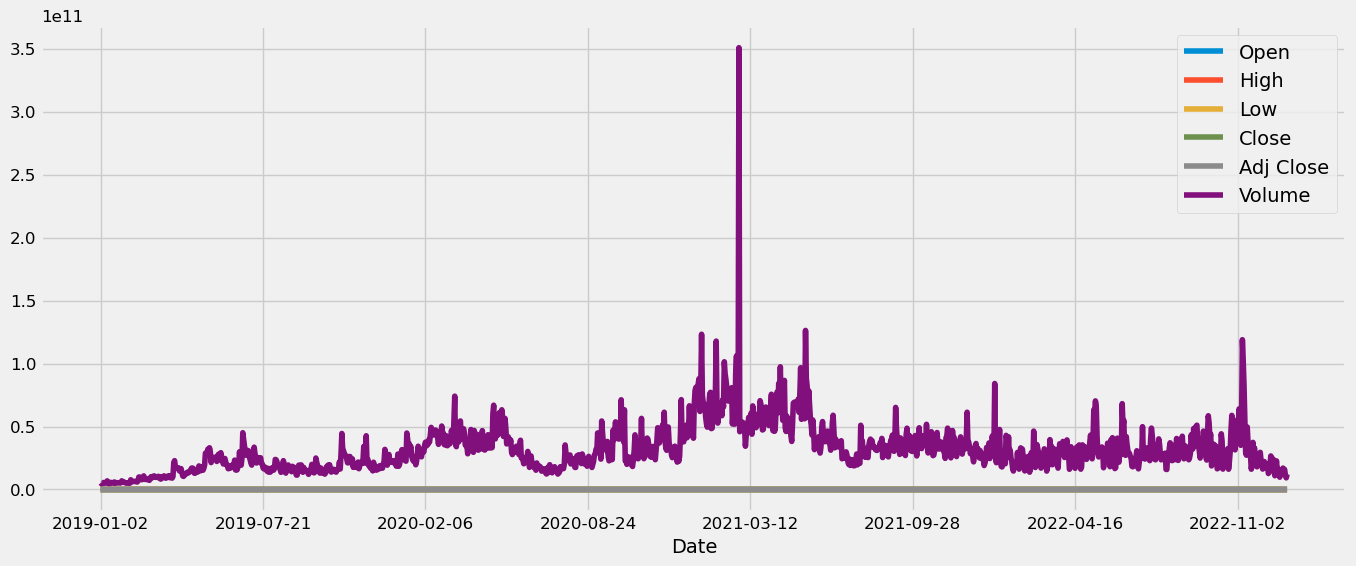

In [45]:
df.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always a strong upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(z, model='trend', period=df['Date'])
fig = decomposition.plot()
plt.show()

NameError: name 'sm' is not defined

The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

### Step 5: Stationarity Check and Seasonal Decomposition

## Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

Parameter Selection for the ARIMA Time Series Model

In [61]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [62]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/home/kev/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/kev/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/kev/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/kev/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/kev/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequenc

In [19]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


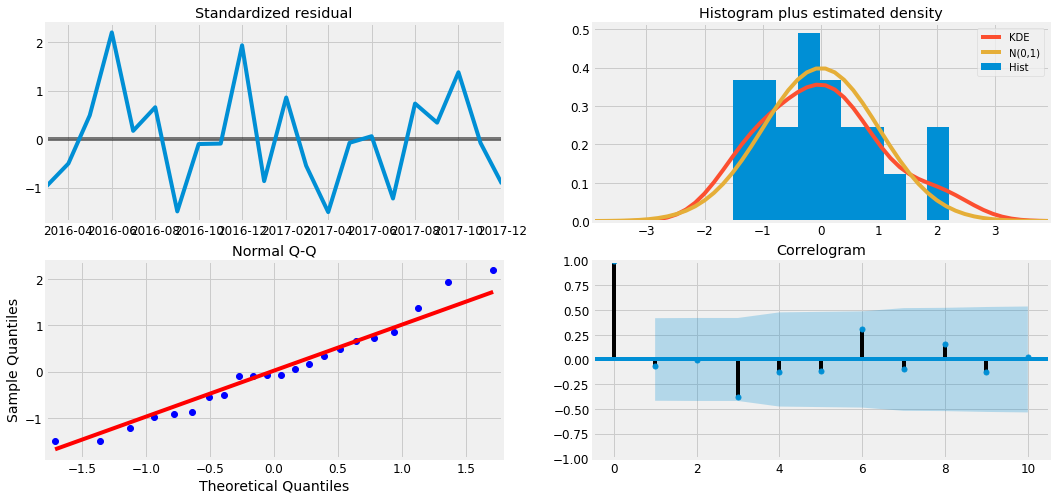

In [20]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017-07-01 to the end of the data.

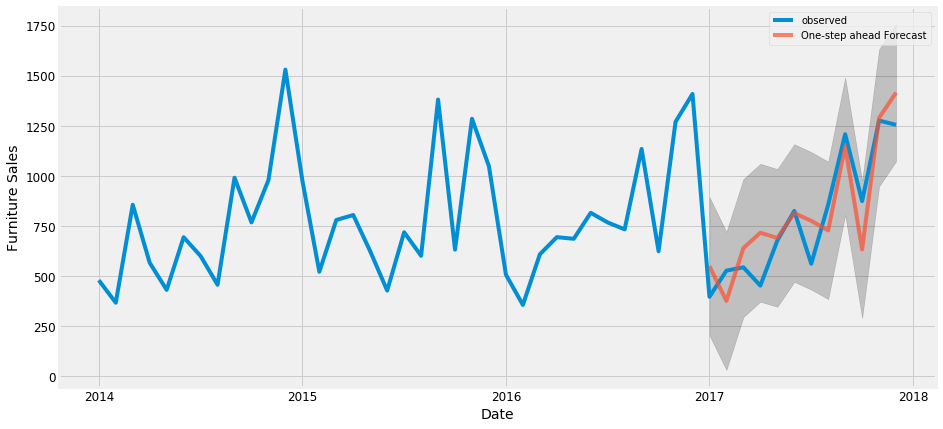

In [21]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year.

In [23]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 22993.58


In [24]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 151.64


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator—it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, this is a pretty good model so far.

## Producing and visualizing forecasts

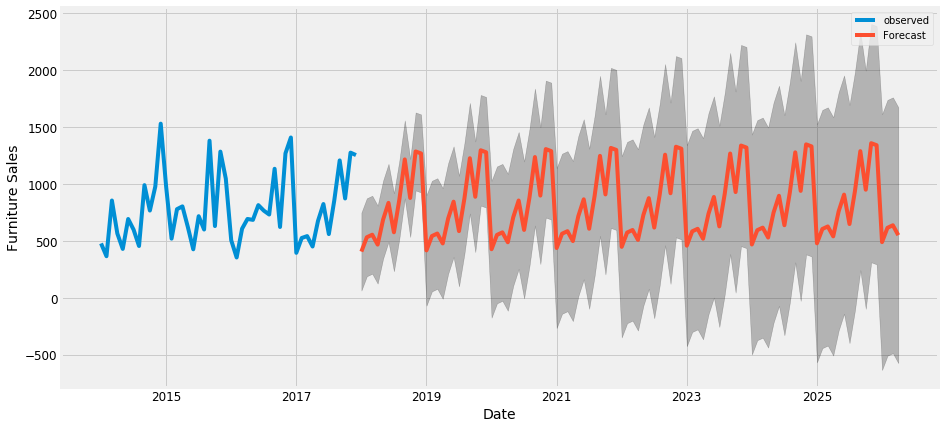

In [73]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

Our model clearly captured furniture sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

The above time series analysis for furniture makes me curious about other categories, and how do they compare with each other onver time. Therefore, we are going to compare time series of furniture and office supplier.

## Time Series comparison furniture sales and Office Supplies

### Data Preprocessing

In [25]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']

According to our data, there were way more number of sales from Office Supplies than from Furniture over the years.

In [26]:
furniture.shape, office.shape

((2121, 21), (6026, 21))

In [27]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()

Have a quick peek, perfect!

In [28]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [29]:
office.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


### Data exploration

We are going to compare two categories' sales in the same time period. This means combine two data frames into one and plot these two categories' time series into one plot.

In [37]:
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


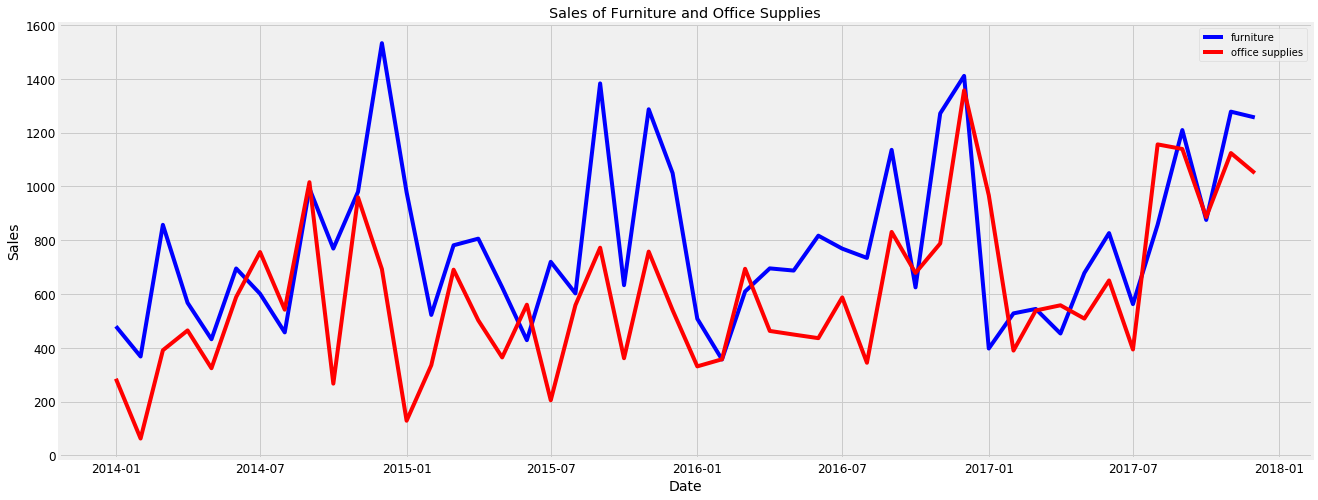

In [38]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

We observe that sales of furniture and office supplies shared a similar seasonal pattern. Early of the year is the off season for both of the two categories. It seems summer time is quiet for office supplies too. in addition, average daily sales for furniture are higher than those of office supplies in most of the months. It is understandable, as the value of furniture should be much higher than those of office supplies. Occationaly, office supplies passed furnitue on average daily sales. Let's find out when was the first time office supplies' sales surpassed those of furniture's. 

In [39]:
first_date = store.ix[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']

print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))

Office supplies first time produced higher sales than furniture is 2014-07-01.


It was July 2014.

### Time Series Modeling with Prophet for Cryptocurrency comparisons

Released by Facebook in 2017, forecasting tool Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. Therefore, we are using Prophet to get a model up and running.

In [44]:
from fbprophet import Prophet

furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)

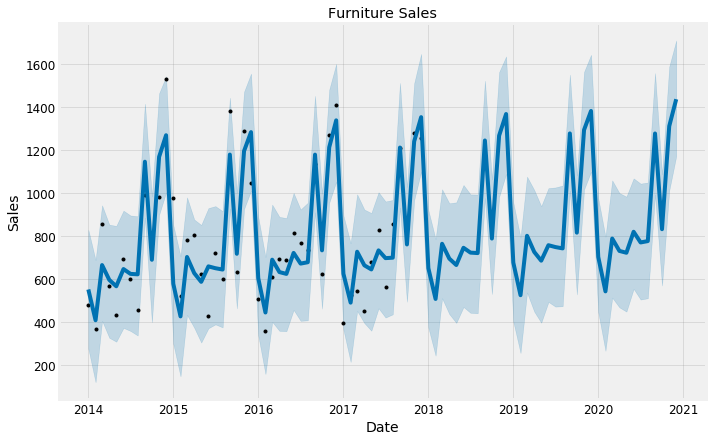

In [48]:
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

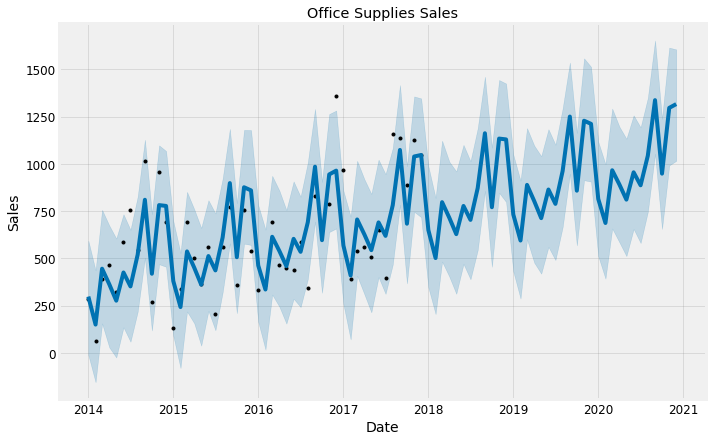

In [49]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

### Compare Forecasts

We already have the forecasts for three years for these two categories into the future. We will now join them together to compare their future forecasts.

In [53]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]

merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()

merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names

forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'office_ds')

forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()

,Date,furniture_trend,furniture_trend_lower,furniture_trend_upper,furniture_yhat_lower,furniture_yhat_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_multiplicative_terms,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_yhat
0,2014-01-01,731.079361,731.079361,731.079361,276.869806,829.451704,-178.836100,-178.836100,-178.836100,0.0,...,-132.483942,-132.483942,-132.483942,0.0,0.0,0.0,-132.483942,-132.483942,-132.483942,297.865749
1,2014-02-01,733.206972,733.206972,733.206972,121.041537,688.538214,-324.048145,-324.048145,-324.048145,0.0,...,-288.226070,-288.226070,-288.226070,0.0,0.0,0.0,-288.226070,-288.226070,-288.226070,149.595672
2,2014-03-01,735.128684,735.128684,735.128684,407.083799,943.409265,-69.406915,-69.406915,-69.406915,0.0,...,0.829065,0.829065,0.829065,0.0,0.0,0.0,0.829065,0.829065,0.829065,445.399757
3,2014-04-01,737.256294,737.256294,737.256294,327.584872,853.485003,-140.477169,-140.477169,-140.477169,0.0,...,-89.156127,-89.156127,-89.156127,0.0,0.0,0.0,-89.156127,-89.156127,-89.156127,362.886617
4,2014-05-01,739.315271,739.315271,739.315271,309.487518,847.622423,-172.355011,-172.355011,-172.355011,0.0,...,-183.195734,-183.195734,-183.195734,0.0,0.0,0.0,-183.195734,-183.195734,-183.195734,276.078026


### Visualizing the trend and the forecast

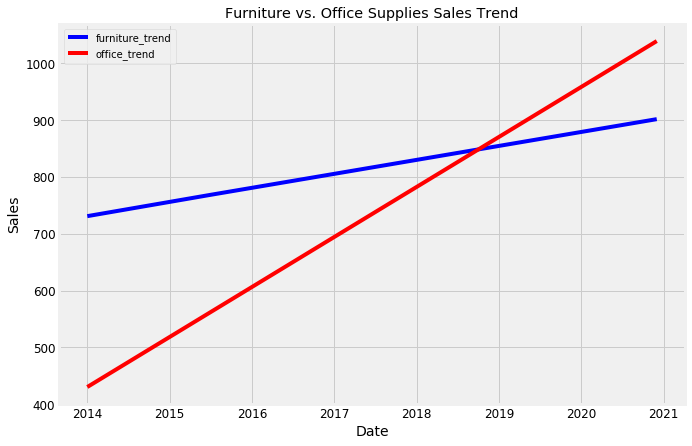

In [62]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend');

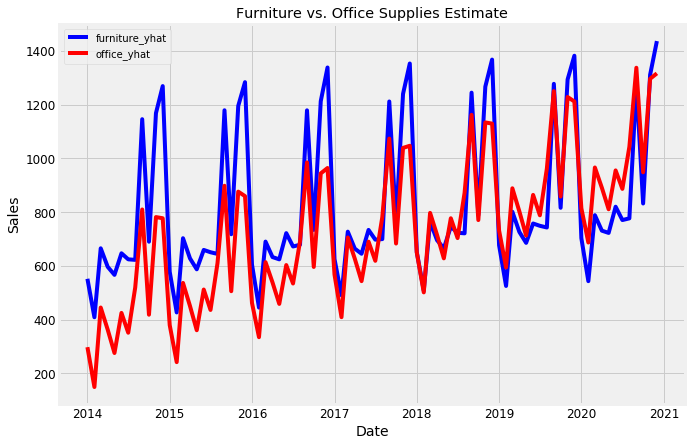

In [63]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate');

### Trends and Patterns

Now, we can use the Prophet Models to inspect different trends of these two categories in the data.

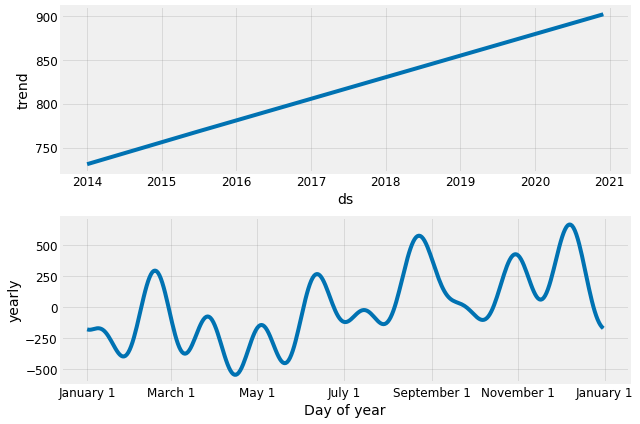

In [68]:
furniture_model.plot_components(furniture_forecast);

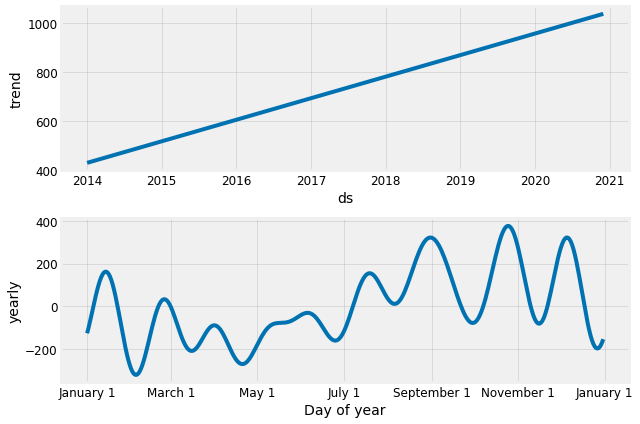

In [70]:
office_model.plot_components(office_forecast);

Good to see that the sales for both furniture and office supplies have been linearly increasing over time although office supplies' growth seems slightly stronger.

The worst month for furniture is April, the worst month for office supplies is February. The best month for furniture is December, and the best month for office supplies is November.

There are many time-series analysis we can explore from now on, such as forecast with uncertainty bounds, change point and anomaly detection, forecast time-series with external data source. We have only scratched the surface here. Stay tuned for future works on time-series analysis.